In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
import seaborn as sns

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
# handling Null Values in data set
# df.dropna(inplace=True)
columns = ["CRIM","ZN","INDUS","CHAS","AGE","LSTAT"]
for column in columns:
  # df[column].fillna(df[column].median(), inplace=True)
  df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-392-fdfdad6798fb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


For Outliers in data

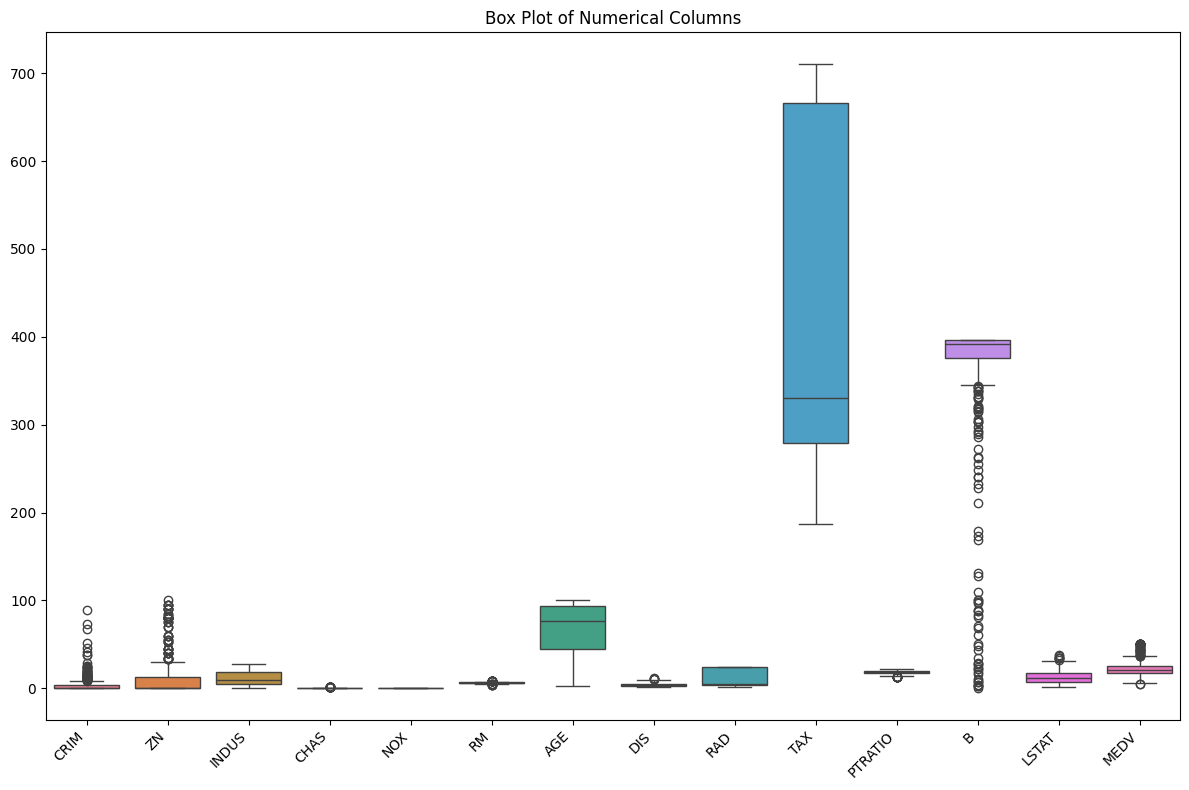

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

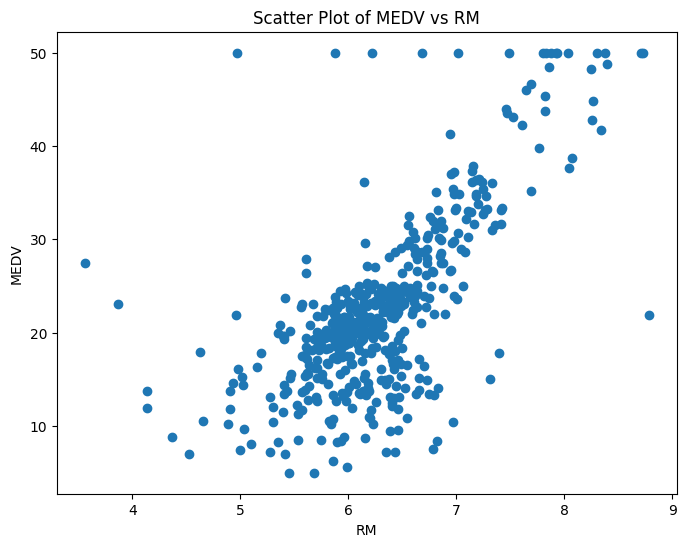

In [ ]:
x_column = 'RM'
y_column = 'MEDV'
plt.figure(figsize=(8, 6))
plt.scatter(df[x_column], df[y_column])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [ ]:
# Standard Deviation Method
# for i in df.columns:
#     upper_limit_expected = df[i].mean() + 3*df[i].std()
#     lower_limit_expected = df[i].mean() -3*df[i].std()
#     df=df[df[i]<upper_limit_expected]
#     df=df[df[i]>lower_limit_expected]

Original shape: (506, 14)
Cleaned shape using isolation_forest: (480, 14)


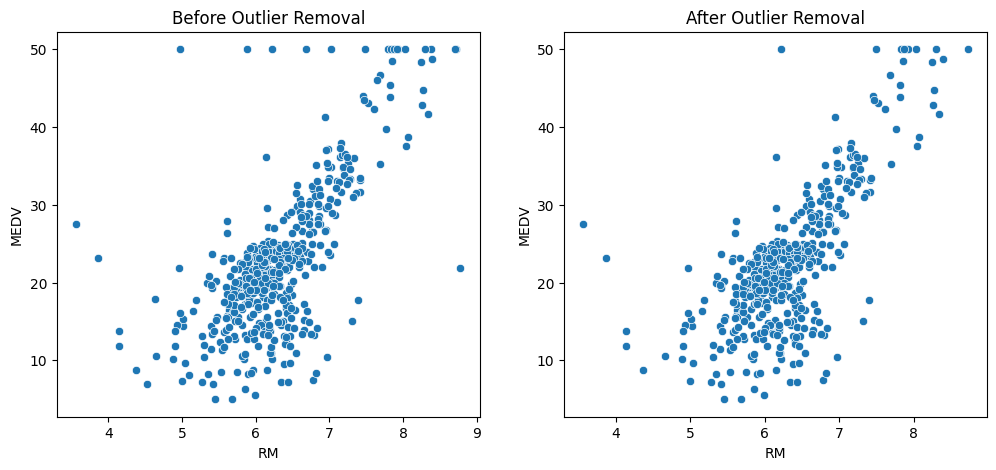

In [ ]:
# Removing Outlier from data
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

print("Original shape:", df.shape)

# Method 1: Z-Score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(zscore(data))
    mask = (z_scores < threshold).all(axis=1)
    return data[mask]

# Method 2: Isolation Forest
def remove_outliers_isolation_forest(data, contamination=0.05):
    clf = IsolationForest(contamination=contamination, random_state=42)
    preds = clf.fit_predict(data)
    mask = preds != -1
    return data[mask]

# Method 3: DBSCAN
def remove_outliers_dbscan(data, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(data)
    mask = labels != -1
    return data[mask]

# method
# method = 'zscore'  # Options: 'zscore', 'isolation_forest', 'dbscan'
method = 'isolation_forest'
# method = 'dbscan'

if method == 'zscore':
    cleaned_df = remove_outliers_zscore(df)
elif method == 'isolation_forest':
    cleaned_df = remove_outliers_isolation_forest(df)
elif method == 'dbscan':
    cleaned_df = remove_outliers_dbscan(df)
else:
    raise ValueError("Invalid method selected.")

print(f"Cleaned shape using {method}: {cleaned_df.shape}")

# Plot before and after
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='RM', y='MEDV', ax=ax[0]).set(title='Before Outlier Removal')
sns.scatterplot(data=cleaned_df, x='RM', y='MEDV', ax=ax[1]).set(title='After Outlier Removal')
plt.show()

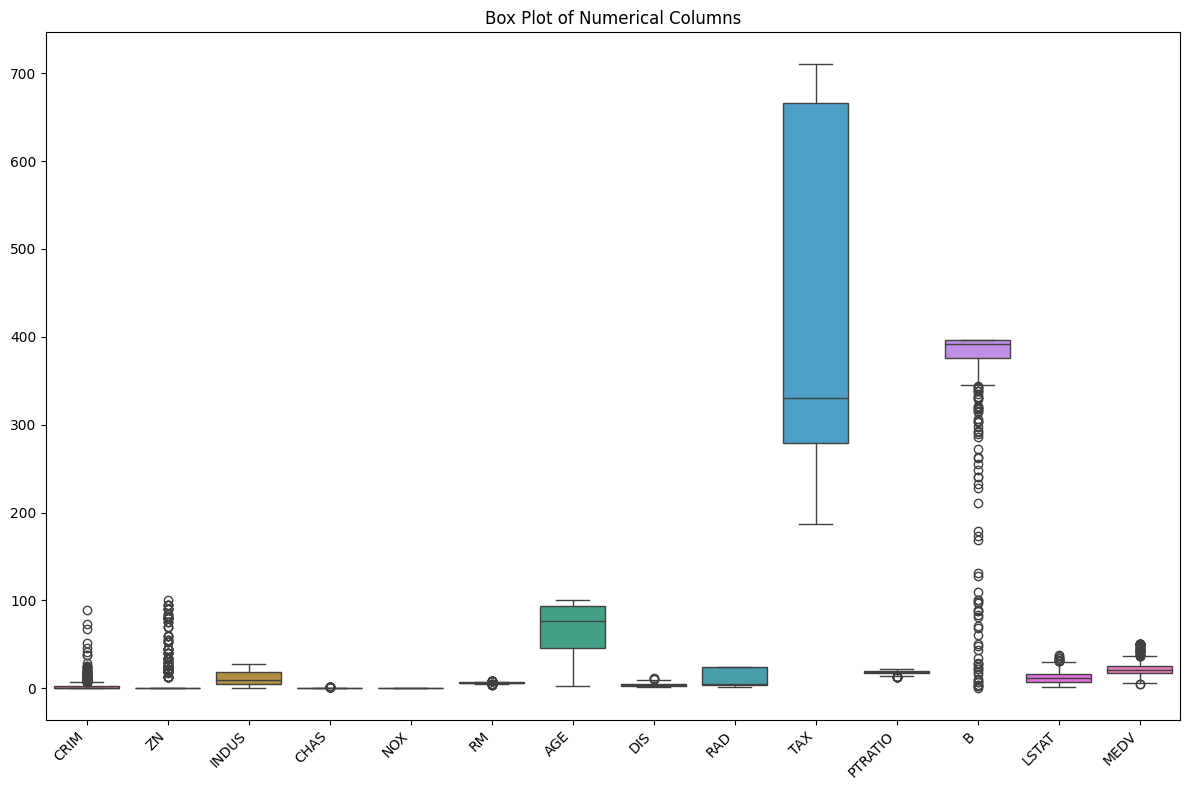

In [ ]:
numerical_cols = cleaned_df.select_dtypes(include=np.number).columns
# numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
cleaned_df.shape, df.shape

((480, 14), (506, 14))

Pearson correlation for feature selection

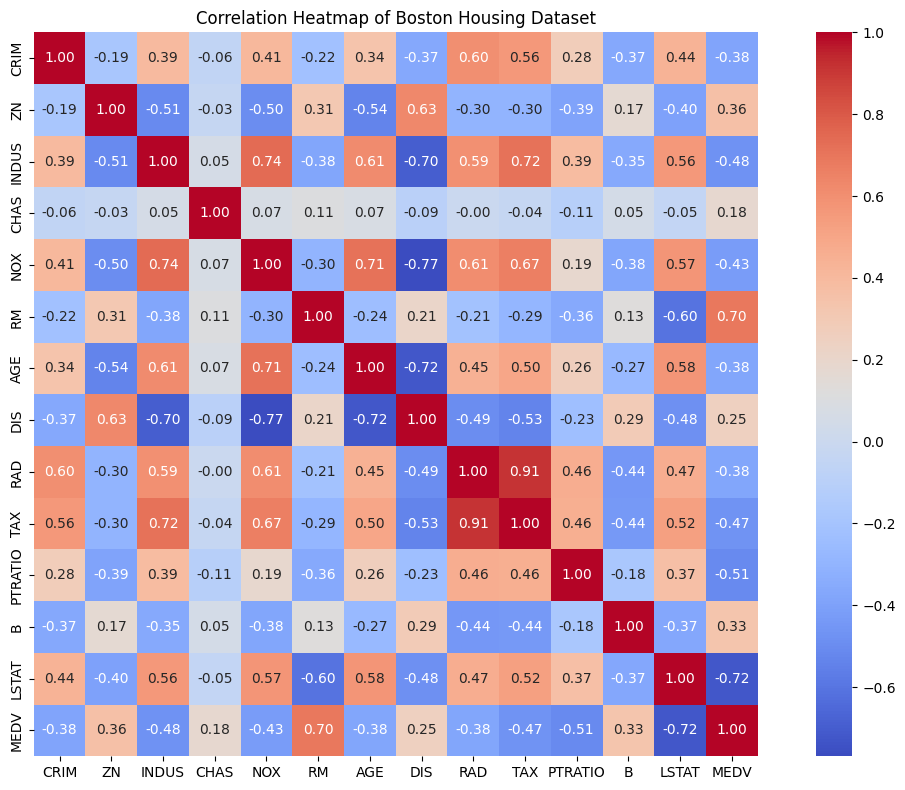

summary: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.479140   10.768775   11.028893    0.067194    0.554695    6.284634   
std      8.570832   23.025124    6.704679    0.250605    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.486962

In [ ]:
summary = df.describe()
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Boston Housing Dataset")
plt.tight_layout()
plt.show()
medv_correlations = correlation_matrix["MEDV"].sort_values(ascending=False)
print(f"summary: \n{summary}\n\nmedv_corr: \n{medv_correlations}")

Train, Test and Split Part With Featured selection part

In [ ]:
x = cleaned_df.drop("MEDV",axis=1)
y = cleaned_df["MEDV"]
# x = cleaned_df.drop(columns=["MEDV","INDUS"],axis=1)
# x = df.drop("MEDV",axis=1)
# x = df.drop(columns=["MEDV","INDUS"],axis=1)
# y = df["MEDV"]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_scaled_minmax = scaler.fit_transform(x)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_scaled_standard = scaler.fit_transform(x)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_scaled_minmax, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape,X_train.shape

((96, 13), (384, 13))

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

1

In [ ]:
corr_features

{'TAX'}

In [ ]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)

In [ ]:
X_test.shape,X_train.shape

((96, 12), (384, 12))

In [ ]:
rmse = []
r2 = []
reg = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), PoissonRegressor(), Lasso(), Ridge(), ElasticNet()]
for model in reg:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, preds)))
    r2.append(r2_score(y_test, preds))
performance_df = pd.DataFrame({"models": ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor",  "PoissonRegressor", "Lasso", "Ridge", "ElasticNet"], "rmse": rmse, "r2": r2}).sort_values("r2", ascending = False)
performance_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,models,rmse,r2
2,RandomForestRegressor,2.746729,0.886374
3,PoissonRegressor,3.492224,0.816324
0,LinearRegression,3.578731,0.807112
5,Ridge,3.599305,0.804888
1,DecisionTreeRegressor,4.029992,0.755400
4,Lasso,4.389048,0.709873
6,ElasticNet,4.446892,0.702175


Working on Random Forest
1. less RMSE(root mean square) than others
2. high R2(coefficient of determination)

In [ ]:
model = RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds))}, R2: {r2_score(y_test, preds)}")
tst = pd.DataFrame({"Predicted values": preds.flatten(), "Actual values": y_test})
tst.head()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds))}, R2: {r2_score(y_test, preds)}")
tst = pd.DataFrame({"Predicted values": preds.flatten(), "Actual values": y_test})
tst.head()

RMSE: 2.9263493144011092, R2: 0.8710267344863541
RMSE: 2.9263493144011092, R2: 0.8710267344863541


,Predicted values,Actual values
73,23.2020,23.4
439,11.3180,12.8
419,11.9740,8.4
289,23.4005,24.8
424,14.2565,11.7


In [ ]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test set (you already have this from your previous code)
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2: {r2_train:.4f}")
print("\nTesting Set Performance:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2: {r2_test:.4f}")

# Interpretation
if r2_train > r2_test and abs(r2_train - r2_test) > 0.1: # Adjust the threshold (0.1) as needed
    print("\nPotential Overfitting: Training performance is significantly better than testing performance.")
elif r2_train < r2_test and abs(r2_train - r2_test) > 0.1: # This case is less common but possible
     print("\nPotential Underfitting or Data Discrepancy: Testing performance is significantly better than training performance.")
elif r2_train < 0.5: # Adjust the R2 threshold (0.5) based on your problem
    print("\nPotential Underfitting: Both training and testing performance are poor.")
else:
    print("\nThe model appears to have a reasonable balance between training and testing performance.")


Training Set Performance:
RMSE: 1.2757
R2: 0.9780

Testing Set Performance:
RMSE: 2.9263
R2: 0.8710

Potential Overfitting: Training performance is significantly better than testing performance.


Hyperparameter tuning Using gridsearch CV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (Negative MSE): {best_score}")

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE on Test Set: {rmse} \nR2 on Test Set: {r2}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Negative MSE): -11.178561877785373
RMSE on Test Set: 2.8988335639098035 
R2 on Test Set: 0.8734407401848708


In [ ]:
# for model deployment
# import joblib
# joblib.dump(best_model,'rf_model.pkl')

#Using NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
DL_model = models.Sequential(
    [
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ]
)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
k = 4
num_val_samples = len(X_train)
num_epochs = 100
all_scores = []

In [ ]:
history = DL_model.fit(X_train, y_train, epochs=100 ,batch_size=32, validation_split=0.2, verbose=1)

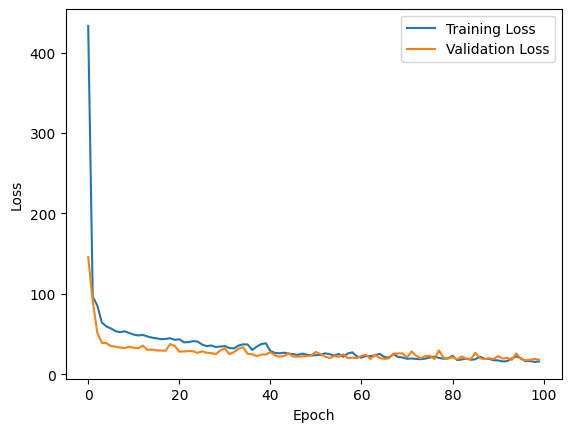

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
mse = DL_model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.5067 - mae: 3.1815
Mean Squared Error on Test Set: [22.84981346130371, 3.31736159324646]


In [ ]:
# Evaluate the model on the test set
y_pred = DL_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE on Test Set: {rmse}")
print(f"R2 on Test Set: {r2}")
# Create a DataFrame with predicted and actual values
# Ensure that the predicted values are 1-dimensional
tst = pd.DataFrame({"Predicted values": y_pred.flatten(), "Actual values": y_test})

tst.head()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on Test Set: 4.780147899975591
R2 on Test Set: 0.6558640589030826


,Predicted values,Actual values
73,25.282944,23.4
439,13.999612,12.8
419,8.676644,8.4
289,21.478569,24.8
424,11.661815,11.7


In [ ]:
tst['diff'] = tst['Predicted values'] - tst['Actual values']
tst['diff'].mean()

np.float64(0.27197451591491695)